In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [103]:
df0_Stock_idx = pd.read_csv('market_index_data_version1.csv')
df1_gov_spend = pd.read_csv('historical-gov-spending-gdp.csv')
df2_mil_spend = pd.read_csv('military-expenditure-share-gdp.csv')
df3_edu_spend = pd.read_csv('total-government-expenditure-on-education-gdp.csv')
df4_urbanization = pd.read_csv('urban-and-rural-population.csv')
df5_adopting_tech = pd.read_csv('ict-adoption-per-100-people.csv')
df6_gdp_per_capita = pd.read_csv('gdp-per-capita-world-bank-constant-usd.csv')
df7_tex_revnue = pd.read_csv('tax-revenues-as-a-share-of-gdp-unu-wider.csv')
df_8_population_growth = pd.read_csv('population-and-demography.csv')
df0_Stock_idx


,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,12/31/1965,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1/3/1966,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1/4/1966,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1/5/1966,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1/6/1966,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
112452,N100,5/27/2021,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,5/28/2021,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,5/31/2021,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,6/1/2021,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


In [104]:
#Clean Data to focus only on the United States...
desired_country = 'United States'  
df1_gov_spend = df1_gov_spend[df1_gov_spend['Entity'] == desired_country]
df2_mil_spend = df2_mil_spend[df2_mil_spend['Entity'] == desired_country]
df3_edu_spend = df3_edu_spend[df3_edu_spend['Entity'] == desired_country]
df4_urbanization = df4_urbanization[df4_urbanization['Entity'] == desired_country]
df5_adopting_tech = df5_adopting_tech[df5_adopting_tech['Entity'] == desired_country]
df6_gdp_per_capita = df6_gdp_per_capita[df6_gdp_per_capita['Entity'] == desired_country]
df7_tax_revnue = df7_tex_revnue[df7_tex_revnue['Entity'] == desired_country]
df_8_population_growth = df_8_population_growth[df_8_population_growth['Country name'] == desired_country]
df7_tax_revnue

,Entity,Code,Year,Taxes including social contributions (as a share of GDP)
5834,United States,USA,1980,25.571890
5835,United States,USA,1981,25.972046
5836,United States,USA,1982,26.054338
5837,United States,USA,1983,24.012712
5838,United States,USA,1984,24.109865
5839,United States,USA,1985,24.658077
5840,United States,USA,1986,24.629921
5841,United States,USA,1987,25.690191
5842,United States,USA,1988,25.478336
5843,United States,USA,1989,25.662542


In [105]:
#Check the time frame of each data set
df1_gov_spend
# 1880 - 2011
df2_mil_spend
#1949 - 2020
df3_edu_spend
#1960 - 2020
df4_urbanization
#1960 - 2021
df5_adopting_tech
#1960 - 2021
df6_gdp_per_capita
#1960 - 2021
df7_tax_revnue
#1902 - 2008


,Entity,Code,Year,Taxes including social contributions (as a share of GDP)
5834,United States,USA,1980,25.571890
5835,United States,USA,1981,25.972046
5836,United States,USA,1982,26.054338
5837,United States,USA,1983,24.012712
5838,United States,USA,1984,24.109865
5839,United States,USA,1985,24.658077
5840,United States,USA,1986,24.629921
5841,United States,USA,1987,25.690191
5842,United States,USA,1988,25.478336
5843,United States,USA,1989,25.662542


In [106]:
# Test merge the dataset on year.. Used two dataset with the exact same time range 1960 -2021. 
merged_df1_urbinization_and_tech_adoption = pd.merge(df4_urbanization, df5_adopting_tech, on=['Year', 'Entity', 'Code'], how='inner')
merged_df1_urbinization_and_tech_adoption

,Entity,Code,Year,Urban population,Rural population,Fixed telephone subscriptions (per 100 people),Fixed broadband subscriptions (per 100 people),Mobile cellular subscriptions (per 100 people),Individuals using the Internet (% of population)
0,United States,USA,1960,126462473,54208530.0,27.963787,NaN,0.000000,NaN
1,United States,USA,1961,129276215,54414784.0,26.386500,NaN,NaN,NaN
2,United States,USA,1962,131988693,54549308.0,26.386500,NaN,NaN,NaN
3,United States,USA,1963,134615404,54626596.0,26.386500,NaN,NaN,NaN
4,United States,USA,1964,137215986,54673016.0,26.386500,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
57,United States,USA,2017,266788716,58333412.0,35.263824,32.808636,103.129790,87.27489
58,United States,USA,2018,268844029,57994170.0,33.218820,33.346176,104.847946,88.49890
59,United States,USA,2019,270737596,57592356.0,31.835100,34.186443,106.414020,89.43028
60,United States,USA,2020,274032053,57469028.0,30.302551,36.087180,104.935370,90.90000


In [107]:
# Test merge the dataset on year.. Used two dataset with different time ranges 1880 - 2011 and 1902 - 2008. 
merged_df = pd.merge(df6_gdp_per_capita, df2_mil_spend, on=['Year', 'Entity', 'Code'], how='left')
merged_df = pd.merge(merged_df, df4_urbanization, on=['Year', 'Entity', 'Code'], how='left')
merged_df = pd.merge(merged_df, df5_adopting_tech, on=['Year', 'Entity', 'Code'], how='left')
merged_df = pd.merge(merged_df, df3_edu_spend, on=['Year', 'Entity', 'Code'], how='left')
merged_df = pd.merge(merged_df, df_8_population_growth, on= 'Year', how='left')
merged_df = pd.merge(df7_tax_revnue, merged_df, on=['Year', 'Entity', 'Code'], how='left')

#merged_df = pd.merge(merged_df, df7, on='Year')
merged_df

,Entity,Code,Year,Taxes including social contributions (as a share of GDP),GDP per capita (constant 2015 US$),military_expenditure_share_gdp,Urban population,Rural population,Fixed telephone subscriptions (per 100 people),Fixed broadband subscriptions (per 100 people),...,population__all__50_54__records,population__all__55_59__records,population__all__60_64__records,population__all__65_69__records,population__all__70_74__records,population__all__75_79__records,population__all__80_84__records,population__all__85_89__records,population__all__90_94__records,population__all__95_99__records
0,United States,USA,1980,25.571890,31161.932,5.15,167551171,59673828.0,42.252396,NaN,...,11981586,11258339,9849099,8727193,6676551,4706041,2920829,1473360,535281,113646
1,United States,USA,1981,25.972046,31640.678,5.65,169552427,59913572.0,46.779236,NaN,...,12046007,11246347,10063518,8736772,6906126,4850335,2958735,1531382,562665,121134
2,United States,USA,1982,26.054338,30775.441,6.81,171528659,60135340.0,47.157257,NaN,...,11892498,11403640,10179691,8729225,7133925,4948502,3040294,1587138,589309,129166
3,United States,USA,1983,24.012712,31893.200,6.32,173459636,60332364.0,48.011070,NaN,...,11775142,11268236,10561876,8709269,7272538,5089481,3114768,1656961,608182,138985
4,United States,USA,1984,24.109865,33906.350,6.24,175321738,60503264.0,48.353542,NaN,...,11524398,11255149,10781419,8844944,7371855,5265148,3164151,1700994,629137,150163
5,United States,USA,1985,24.658077,35008.530,6.45,177239105,60684896.0,49.324980,NaN,...,11157183,11539931,10611705,9110086,7431698,5398484,3266358,1726453,659512,159935
6,United States,USA,1986,24.629921,35887.555,6.63,179244877,60888124.0,49.803265,NaN,...,11015724,11586349,10625057,9276087,7454592,5579112,3368865,1751672,687494,168026
7,United States,USA,1987,25.690191,36798.605,6.42,181215212,61073788.0,51.193510,NaN,...,11015377,11439706,10784512,9383348,7454509,5776673,3450442,1805984,711403,174542
8,United States,USA,1988,25.478336,37989.190,6.07,183232441,61266560.0,52.452810,NaN,...,11077839,11315342,10672123,9735799,7445972,5901395,3555101,1856457,741552,177970
9,United States,USA,1989,25.662542,39014.203,5.87,185333919,61485080.0,53.685394,NaN,...,11248413,11073399,10689761,9947234,7579150,6000501,3679256,1891142,759885,183285


In [108]:
df_project = merged_df

In [109]:
df_project

,Entity,Code,Year,Taxes including social contributions (as a share of GDP),GDP per capita (constant 2015 US$),military_expenditure_share_gdp,Urban population,Rural population,Fixed telephone subscriptions (per 100 people),Fixed broadband subscriptions (per 100 people),...,population__all__50_54__records,population__all__55_59__records,population__all__60_64__records,population__all__65_69__records,population__all__70_74__records,population__all__75_79__records,population__all__80_84__records,population__all__85_89__records,population__all__90_94__records,population__all__95_99__records
0,United States,USA,1980,25.571890,31161.932,5.15,167551171,59673828.0,42.252396,NaN,...,11981586,11258339,9849099,8727193,6676551,4706041,2920829,1473360,535281,113646
1,United States,USA,1981,25.972046,31640.678,5.65,169552427,59913572.0,46.779236,NaN,...,12046007,11246347,10063518,8736772,6906126,4850335,2958735,1531382,562665,121134
2,United States,USA,1982,26.054338,30775.441,6.81,171528659,60135340.0,47.157257,NaN,...,11892498,11403640,10179691,8729225,7133925,4948502,3040294,1587138,589309,129166
3,United States,USA,1983,24.012712,31893.200,6.32,173459636,60332364.0,48.011070,NaN,...,11775142,11268236,10561876,8709269,7272538,5089481,3114768,1656961,608182,138985
4,United States,USA,1984,24.109865,33906.350,6.24,175321738,60503264.0,48.353542,NaN,...,11524398,11255149,10781419,8844944,7371855,5265148,3164151,1700994,629137,150163
5,United States,USA,1985,24.658077,35008.530,6.45,177239105,60684896.0,49.324980,NaN,...,11157183,11539931,10611705,9110086,7431698,5398484,3266358,1726453,659512,159935
6,United States,USA,1986,24.629921,35887.555,6.63,179244877,60888124.0,49.803265,NaN,...,11015724,11586349,10625057,9276087,7454592,5579112,3368865,1751672,687494,168026
7,United States,USA,1987,25.690191,36798.605,6.42,181215212,61073788.0,51.193510,NaN,...,11015377,11439706,10784512,9383348,7454509,5776673,3450442,1805984,711403,174542
8,United States,USA,1988,25.478336,37989.190,6.07,183232441,61266560.0,52.452810,NaN,...,11077839,11315342,10672123,9735799,7445972,5901395,3555101,1856457,741552,177970
9,United States,USA,1989,25.662542,39014.203,5.87,185333919,61485080.0,53.685394,NaN,...,11248413,11073399,10689761,9947234,7579150,6000501,3679256,1891142,759885,183285


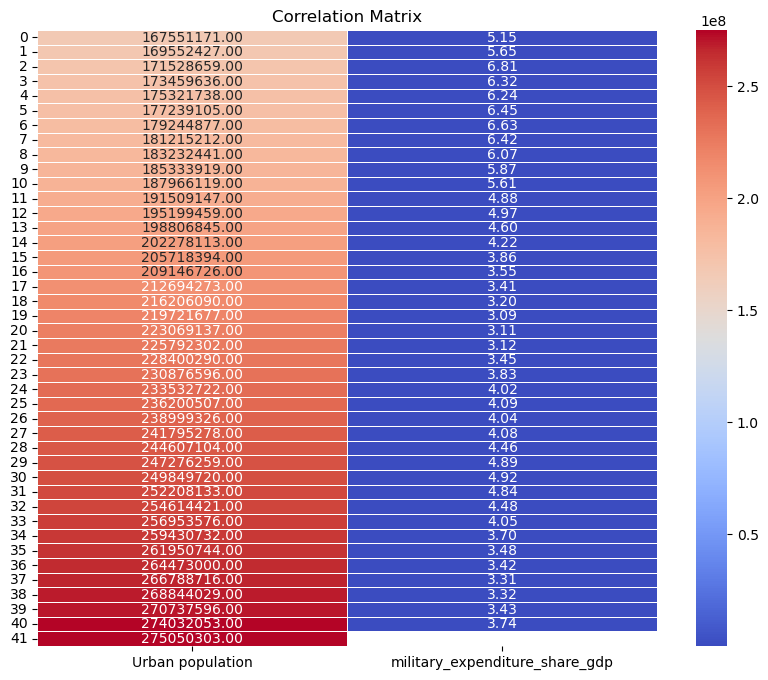

In [115]:
columns_to_remove = ['Entity', 'Code', 'Country name' ]
df_project_2 = df_project.drop(columns=columns_to_remove)
#df_project_2 = df_project_2.groupby('GDP per capita (constant 2015 US$)')
columns_of_interest = ['Urban population', 'military_expenditure_share_gdp']
correlation_matrix = df_project_2[columns_of_interest]
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()